# Chapter 3
## Linear Regression

In [1]:
# Import std libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import axes3d

from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline
plt.style.use('seaborn-white')

### Load Data

In [2]:
advertising = pd.read_csv('C:/GitProjects/ISLR With Python/Data/Advertising.csv', usecols=[1,2,3,4])
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB


In [3]:
advertising.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
credit = pd.read_csv('C:/GitProjects/ISLR With Python/Data/Credit.csv', usecols=list(range(1, 12)))
credit['Student2'] = credit.Student.map({'No':0, 'Yes':1})
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
Income       400 non-null float64
Limit        400 non-null int64
Rating       400 non-null int64
Cards        400 non-null int64
Age          400 non-null int64
Education    400 non-null int64
Gender       400 non-null object
Student      400 non-null object
Married      400 non-null object
Ethnicity    400 non-null object
Balance      400 non-null int64
Student2     400 non-null int64
dtypes: float64(1), int64(7), object(4)
memory usage: 37.6+ KB


In [5]:
credit.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,Student2
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333,0
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903,1
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580,0
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964,0
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331,0


In [6]:
auto = pd.read_csv('C:/GitProjects/ISLR With Python/Data/auto.csv', na_values='?').dropna()
auto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 9 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null float64
weight          392 non-null int64
acceleration    392 non-null float64
year            392 non-null int64
origin          392 non-null int64
name            392 non-null object
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


In [7]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


## Simple Linear Regression
### Least Squares Fit

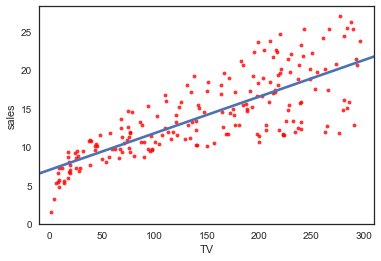

In [8]:
sns.regplot(advertising.TV, advertising.sales, order=1, ci=None, scatter_kws={'color':'red', 's':15})
plt.xlim(-10, 310)
plt.ylim(ymin=0);

In [9]:
# Regression Coefficients using Ordinary Least Squares
regressor = skl_lm.LinearRegression()
X = scale(advertising.TV, with_mean=True, with_std=False).reshape(-1,1)
Y = advertising.sales

regressor.fit(X, Y)
print(regressor.intercept_)
print(regressor.coef_)

14.0225
[ 0.04753664]


In [10]:
# Create Grid coordinates for plotting
b0 = np.linspace(regressor.intercept_ - 2, regressor.intercept_ + 2, 50)
b1 = np.linspace(regressor.coef_ - 0.02, regressor.coef_ + 0.02, 50)
xx, yy = np.meshgrid(b0, b1, indexing='xy')
Z = np.zeros((b0.size, b1.size))

# Calculate RSS (Z values) based on grid of coefficients (b0 and b1)
for (i,j), _ in np.ndenumerate(Z):
    Z[i,j] = ((Y - (xx[i,j] + X.ravel()*yy[i,j]))**2).sum()/1000
    
# Optimal RSS
opt_rss = np.sum((Y.ravel() - (regressor.intercept_ + regressor.coef_*X.ravel()))**2)/1000
print(opt_rss)

2.10253058313
